In [26]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle
import LinearRegression

%reload_ext autoreload
%autoreload 2

In [20]:
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

In [21]:
# 打乱数据
X, y = shuffle(data, target, random_state = 13)
X = X.astype(np.float32) # float64-->float32

In [22]:
# 训练集与测试集的简单划分
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (397, 10)
X_test= (45, 10)
y_train= (397, 1)
y_test= (45, 1)


In [27]:
# 执行训练
lr = LinearRegression.LinearRegression()
loss_list, params, grads = lr.linear_train(X_train, y_train, 0.001, 100000)

epoch 10000 loss 2869.670557
epoch 20000 loss 2866.159558
epoch 30000 loss 2863.198013
epoch 40000 loss 2860.685698
epoch 50000 loss 2858.551609
epoch 60000 loss 2856.738117
epoch 70000 loss 2855.196896
epoch 80000 loss 2853.887029
epoch 90000 loss 2852.773777


In [29]:
# 预测
y_pred = lr.predict(X_test, params)
y_pred[:5]

array([[118.8034897 ],
       [162.70920299],
       [132.73704427],
       [100.0746456 ],
       [142.05385378]])

Text(0.5, 0, 'X')

Text(0, 0.5, 'y')

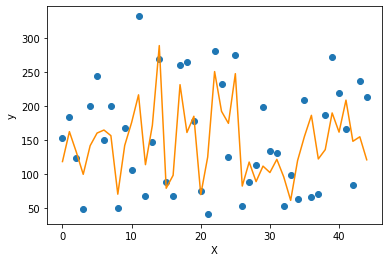

In [30]:
import matplotlib.pyplot as plt

f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# 可见全变量的数据对于线性回归模型的拟合并不好，一来数据本身的分布问题，二来简单的线性模型对于该数据拟合效果差。当然，我们只是为了演示线性回归模型的基本过程，不要在意效果。

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'loss')

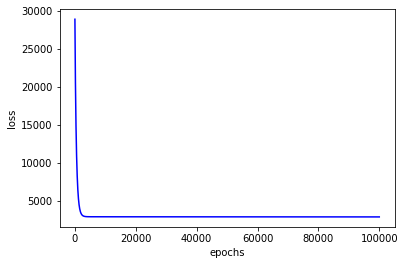

In [31]:
# 训练过程中损失的下降
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [33]:
# 交叉验证
for train, validation in lr.linear_cross_validation(data, 5):
    X_train = train[:, :10]
    y_train = train[:, -1].reshape((-1, 1))
    X_valid = validation[:, :10]
    y_valid = validation[:, -1].reshape((-1, 1))

    loss5, params, grads = lr.linear_train(X_train, y_train, 0.001, 100000)
    score = np.mean(loss5)
    print('five kold cross validation score is', score)
    y_pred = lr.predict(X_valid, params)
    valid_score = np.sum(((y_pred - y_valid) ** 2)) / len(X_valid)
    print('valid score is', valid_score)

epoch 10000 loss 0.000000
epoch 20000 loss 0.000000
epoch 30000 loss 0.000000
epoch 40000 loss 0.000000
epoch 50000 loss 0.000000
epoch 60000 loss 0.000000
epoch 70000 loss 0.000000
epoch 80000 loss 0.000000
epoch 90000 loss 0.000000
five kold cross validation score is 1.417022201863749e-05
valid score is 2.9212940423577956e-11
epoch 10000 loss 0.000000
epoch 20000 loss 0.000000
epoch 30000 loss 0.000000
epoch 40000 loss 0.000000
epoch 50000 loss 0.000000
epoch 60000 loss 0.000000
epoch 70000 loss 0.000000
epoch 80000 loss 0.000000
epoch 90000 loss 0.000000
five kold cross validation score is 1.4170400400457815e-05
valid score is 4.6025120532881146e-11
epoch 10000 loss 0.000000
epoch 20000 loss 0.000000
epoch 30000 loss 0.000000
epoch 40000 loss 0.000000
epoch 50000 loss 0.000000
epoch 60000 loss 0.000000
epoch 70000 loss 0.000000
epoch 80000 loss 0.000000
epoch 90000 loss 0.000000
five kold cross validation score is 1.4129911663865757e-05
valid score is 1.00804182097374e-10
epoch 1000